In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [47]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [49]:
X = train.drop(['label'], axis = 1)
y = train.label

In [50]:
X.shape, y.shape

((42000, 784), (42000,))

In [51]:
X = X.values.reshape(X.shape[0], 28,28,1)
X = X/255.0

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size = 0.1)

In [53]:
import tensorflow as tf

In [54]:
conv_model = tf.keras.models.Sequential([
             tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape = (28,28,1)),
             tf.keras.layers.MaxPool2D(2,2),
             tf.keras.layers.Dropout(0.25),
    
             tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
             tf.keras.layers.MaxPool2D(2,2),
             tf.keras.layers.Dropout(0.25),
    
             tf.keras.layers.Flatten(),
             tf.keras.layers.Dense(256,activation='relu'),
             tf.keras.layers.Dense(128,activation='relu'),
             tf.keras.layers.Dense(10,activation='softmax')
])

In [55]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [56]:
X_train.shape, y_train.shape

((37800, 28, 28, 1), (37800,))

In [57]:
conv_model.compile(optimizer = tf.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=5,
                                  zoom_range = 0.1,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

train_datagen.fit(X_train)


In [61]:
history = conv_model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = 200),
                                  epochs = 10,
                                  steps_per_epoch = X_train.shape[0]//200,
                                  validation_data = (X_test,y_test))

Epoch 1/10
189/189 [==============================] - 37s 198ms/step - loss: 0.8329 - accuracy: 0.7229 - val_loss: 0.1233 - val_accuracy: 0.9633
Epoch 2/10
189/189 [==============================] - 35s 186ms/step - loss: 0.2567 - accuracy: 0.9231 - val_loss: 0.0833 - val_accuracy: 0.9726
Epoch 3/10
189/189 [==============================] - 36s 193ms/step - loss: 0.1813 - accuracy: 0.9463 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 4/10
189/189 [==============================] - 35s 183ms/step - loss: 0.1386 - accuracy: 0.9590 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 5/10
189/189 [==============================] - 35s 187ms/step - loss: 0.1161 - accuracy: 0.9652 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 6/10
189/189 [==============================] - 35s 187ms/step - loss: 0.1013 - accuracy: 0.9707 - val_loss: 0.0364 - val_accuracy: 0.9895
Epoch 7/10
189/189 [==============================] - 34s 181ms/step - loss: 0.0905 - accuracy: 0.9731 - val_loss: 0.0325 - val_ac

In [64]:
history.history['val_loss']

[0.12325187772512436,
 0.08326142281293869,
 0.057926375418901443,
 0.04605411738157272,
 0.052820153534412384,
 0.036367375403642654,
 0.03252572938799858,
 0.0318564735352993,
 0.032198645174503326,
 0.03311748430132866]

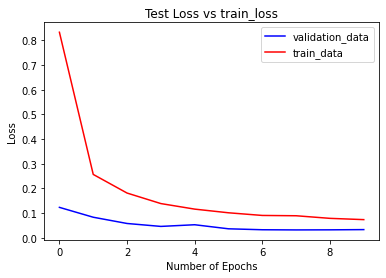

In [68]:
plt.plot(history.history['val_loss'], color = 'b', label = 'validation_data')
plt.plot(history.history['loss'], color = 'r', label = 'train_data')
plt.title("Test Loss vs train_loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()